In [18]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import seaborn as sns
import pandas as pd
import dlsfunctions as dls

In [19]:
import scipy
import scipy.optimize
import scipy.integrate

In [20]:
r_1 = 2.2439608235145855e-09    # in meters
diameter_1 = r_1 * 2
sigma_1 = 5e-10
c = 1
d = np.linspace(5e-10, 9e-9, 20)

In [21]:
f_1 = dls.generate_distribution(d, diameter_1, sigma_1, c)

In [22]:
dls.check_distribution_norm(f_1, d[1]-d[0])

0.9999999999999996

In [23]:
# Let's put beta into g2's inference parameters
def g2(theta, d, gamma, time):
    #unpack parameters
    f, beta = theta
    size = len(time)
    g2 = np.zeros(size)
    delta_d = d[1] - d[0]
    
    for i in range(size):
        expo = np.exp(-(gamma*time[i])/d)
        sum_squared = (np.sum(f*expo*delta_d))**2
        g2[i] = beta*sum_squared
    return g2

In [24]:
beta = 1
theta_in = (f_1, beta)

In [25]:
gamma_1 = dls.calc_gamma(20, c, 1e-3, 1.33, np.pi/2, 1.38e-23, 298.15, 638e-9)
time_in = np.linspace(1e-4, 1e-1, 200)

In [26]:
simulated_data_1 = g2(theta_in, d, gamma_1, time_in*0.001)

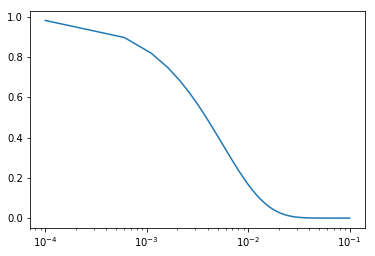

In [27]:
plt.semilogx(time_in, simulated_data_1)

In [28]:
ndim = 21
nwalkers = 100
nsteps = 900

In [30]:
prelim_pos = f_1
start_pos = [prelim_pos + 1e-4*np.random.randn(ndim-1) for i in range(nwalkers)] 

In [33]:
len(start_pos)

100

In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, simulated_data_1, gamma_1, 40, time_in*0.001))

In [16]:
prelim_pos

array([1.22551581e-05, 1.03211529e-02, 3.90356411e+00, 6.63007174e+02,
       5.05706979e+04, 1.73222170e+06, 2.66459869e+07, 1.84070399e+08,
       5.71031289e+08, 7.95535685e+08, 4.97717870e+08, 1.39839741e+08,
       1.76441928e+07, 9.99762371e+05, 2.54399110e+04, 2.90708812e+02,
       1.49184813e+00, 3.43807097e-03, 3.55818784e-06, 1.65373802e-09])

In [34]:
start_pos

[array([-7.96040345e-06,  1.03402854e-02,  3.90356219e+00,  6.63007229e+02,
         5.05706980e+04,  1.73222170e+06,  2.66459869e+07,  1.84070399e+08,
         5.71031289e+08,  7.95535685e+08,  4.97717870e+08,  1.39839741e+08,
         1.76441928e+07,  9.99762371e+05,  2.54399111e+04,  2.90708909e+02,
         1.49200365e+00,  3.44877643e-03,  5.27053400e-05, -2.97824538e-05]),
 array([ 8.65513818e-05,  1.01300875e-02,  3.90340360e+00,  6.63007154e+02,
         5.05706979e+04,  1.73222170e+06,  2.66459869e+07,  1.84070399e+08,
         5.71031289e+08,  7.95535685e+08,  4.97717870e+08,  1.39839741e+08,
         1.76441928e+07,  9.99762371e+05,  2.54399110e+04,  2.90708980e+02,
         1.49159959e+00,  3.35565455e-03, -4.87085037e-05, -7.83881455e-05]),
 array([ 7.54174748e-05,  1.02670387e-02,  3.90368774e+00,  6.63007183e+02,
         5.05706979e+04,  1.73222170e+06,  2.66459869e+07,  1.84070399e+08,
         5.71031289e+08,  7.95535685e+08,  4.97717870e+08,  1.39839741e+08,
        

In [ ]:
result = sampler.run_mcmc(start_pos, nsteps)

In [ ]:
sampler.acceptance_fraction

In [ ]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)